In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [4]:
reference = pd.read_csv("reference_without_add.csv") 
# reference values
reference_values = reference.iloc[0]
travel_reference = reference_values["TravelTime"]
fuel_reference = reference_values["FuelConsumption"]
co2_reference = reference_values["CO2Emission"]  

#### Les donnees

In [5]:
data1 = pd.read_csv('data0_1.csv')
data2 = pd.read_csv("data0_2.csv")
data3 = pd.read_csv("data0_5.csv")
datas = pd.concat([data1, data2, data3], ignore_index= True).sample(frac=1, random_state=42).reset_index(drop=True)
datas= datas[(datas["ActionId"] != 0)]
# datas = datas[datas['TravelTime'] < 130]
datas.rename(columns={'DateTime': 'StartTime'}, inplace=True)
datas['EndTime'] = datas['StartTime'] + datas['ActionDuration']
len(datas)
datas.head(5)

6197

,StartTime,VehicleID,X,Y,Longitude,Latitude,Speed,Acceleration,FuelConsumption,CO2Emission,...,ActionDuration,LaneMaxSpeed,Neighbors,AllowedSpeed,VehicleAdded,VehicleAddedAhead,VehicleAddedBehind,ActionVehicleAhead,ActionVehicleBehind,EndTime
0,53,veh1,520.928043,780.584754,1.467963,43.566866,7.147393,-0.652833,215240.520454,6.748431e+05,...,11,16.66,1,15.632078,0,0,0,1,0,64
2,21,veh1,576.541784,540.492539,1.468706,43.564714,12.199157,1.695573,165096.530098,5.176240e+05,...,6,27.78,5,18.766000,8,3,5,3,0,27
3,18,veh1,522.853482,490.318745,1.468053,43.564254,5.750539,5.750539,352586.718795,1.105398e+06,...,14,27.78,2,18.766000,12,4,8,3,1,32
4,19,veh1,539.261338,513.304129,1.468251,43.564464,10.359101,-3.919571,169005.285664,5.298798e+05,...,11,27.78,3,18.766000,6,4,2,2,2,30
5,57,veh1,497.907593,823.331530,1.467669,43.567247,15.956224,1.025041,177308.244397,5.559139e+05,...,8,16.66,1,15.632078,0,0,0,1,0,65


<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Fuel Consumption')

Text(0, 0.5, 'CO2 Emission')

Text(0.5, 1.0, 'Fuel Consumption vs CO2 Emission')

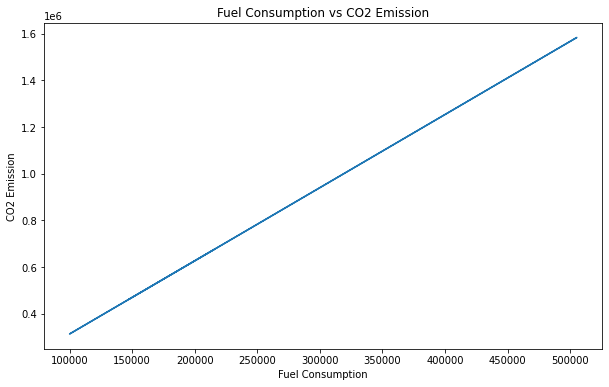

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(datas['FuelConsumption'].to_numpy(), datas['CO2Emission'].to_numpy())
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.title('Fuel Consumption vs CO2 Emission')
plt.show()

In [6]:
datas['y_fuel'] = datas['FuelConsumption'].apply(lambda x: (fuel_reference -x)/ 1000)
datas['y_travel'] = datas['TravelTime'].apply(lambda x: (travel_reference - x))
data_transformed1 = pd.get_dummies(datas['ActionName'], prefix='action').astype(int)
datas = pd.concat([datas, data_transformed1], axis=1)

#### Box plot des colonnes

In [7]:
# ml_columns = ['Longitude', 'Latitude', 'Speed','Acceleration', 'LaneMaxSpeed', 'ActionVehicleAhead',
#                  'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'ActionDuration']

# # Définir la taille de la figure
# plt.figure(figsize=(24, 8))

# # Parcourir chaque colonne et créer un boxplot
# for i, col in enumerate(ml_columns):
#     plt.subplot(1, len(ml_columns), i + 1)
#     sns.boxplot(y=datas[col], orient='v')
#     plt.title(col)

# # Ajuster automatiquement les sous-tracés pour éviter les chevauchements
# plt.tight_layout()

# # Afficher le graphique
# plt.show()

#### Filtrage des donnees

In [8]:
datas = datas.drop(datas[(datas['Longitude'] < 1.467) | (datas['Acceleration'] > 8 )].index)

In [9]:
len(datas)

5937

In [10]:
def filter_iqr_column(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    # lower_bound = q1
    upper_bound = q3 + 1.5 * iqr
    # upper_bound = q3
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

<AxesSubplot:ylabel='y_fuel'>

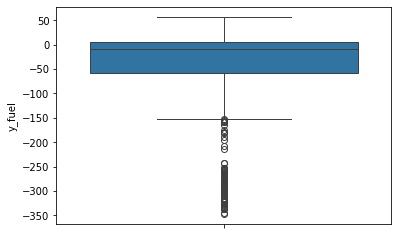

In [11]:
action_accelerate = datas[datas['action_accelerate'] == 1]
action_decelerate = datas[datas['action_decelerate'] == 1]
action_stop = datas[datas['action_stop'] == 1]
sns.boxplot(datas['y_fuel'])

In [12]:
q1 = action_accelerate['y_fuel'].quantile(0.25)
q3 = action_accelerate['y_fuel'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
# lower_bound = q1
upper_bound = q3 + 1.5 * iqr
q1
q3
lower_bound

-92.69906528313165

-42.621966104120354

-167.8147140516486

In [13]:
len(datas)

5937

In [14]:
datas_filtered = filter_iqr_column(datas, 'y_fuel')

<AxesSubplot:ylabel='y_fuel'>

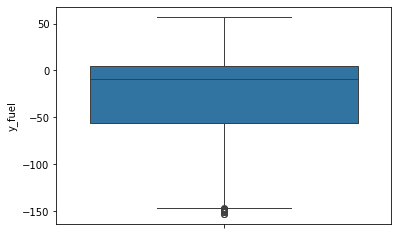

In [15]:
sns.boxplot(datas_filtered['y_fuel'])

<AxesSubplot:ylabel='y_fuel'>

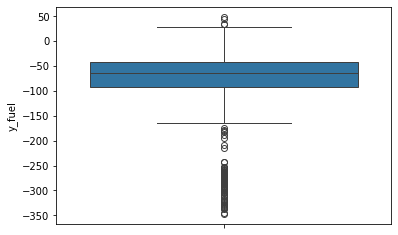

In [16]:
sns.boxplot(action_accelerate['y_fuel'])

<AxesSubplot:ylabel='y_fuel'>

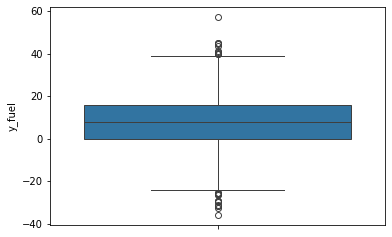

In [17]:
sns.boxplot(action_decelerate['y_fuel'])

<AxesSubplot:ylabel='y_fuel'>

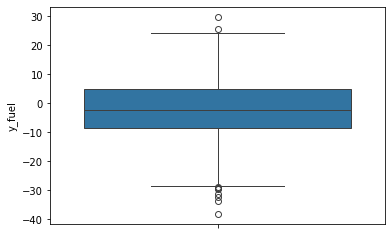

In [18]:
sns.boxplot(action_stop['y_fuel'])

In [19]:
action_accelerate_filtered = datas_filtered[datas_filtered['action_accelerate'] == 1]
action_decelerate_filtered = datas_filtered[datas_filtered['action_decelerate'] == 1]
action_stop_filtered = datas_filtered[datas_filtered['action_stop'] == 1]

<AxesSubplot:ylabel='y_fuel'>

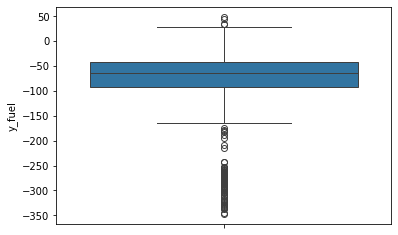

In [20]:
sns.boxplot(action_accelerate['y_fuel'])


<AxesSubplot:ylabel='y_fuel'>

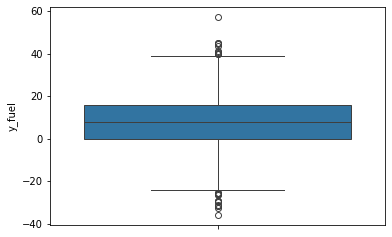

In [21]:
sns.boxplot(action_decelerate['y_fuel'])

<AxesSubplot:ylabel='y_fuel'>

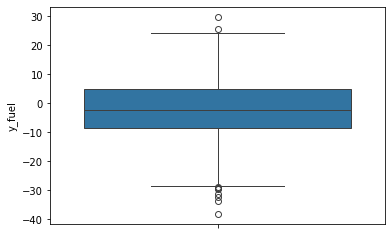

In [22]:
sns.boxplot(action_stop_filtered['y_fuel'])

In [23]:
datas_filtered = datas.drop(datas[(
    ((datas['action_accelerate'] == 1) & ((datas['y_fuel']  < -150) | (datas['y_fuel'] > 25))) |
    ((datas['action_decelerate'] == 1) & ((datas['y_fuel']  < -20) | (datas['y_fuel'] > 38))) |
    ((datas['action_stop'] == 1) & ((datas['y_fuel']  < -25) | (datas['y_fuel'] > 25)))
)].index)

In [24]:
action_accelerate_filtered = datas_filtered[datas_filtered['action_accelerate'] == 1]
action_decelerate_filtered = datas_filtered[datas_filtered['action_decelerate'] == 1]
action_stop_filtered = datas_filtered[datas_filtered['action_stop'] == 1]

<AxesSubplot:ylabel='y_fuel'>

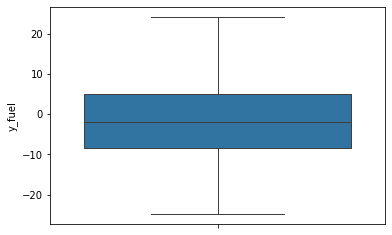

In [25]:
sns.boxplot(action_stop_filtered['y_fuel'])

In [26]:
len(datas_filtered)

5751

In [27]:
datas_filtered = (pd.concat([action_accelerate_filtered.sample(2000, random_state=42),
                             action_decelerate_filtered,
                             action_stop_filtered], 
                             ignore_index=True)).sample(frac=1, random_state=42).reset_index(drop=True)

<AxesSubplot:xlabel='count', ylabel='ActionName'>

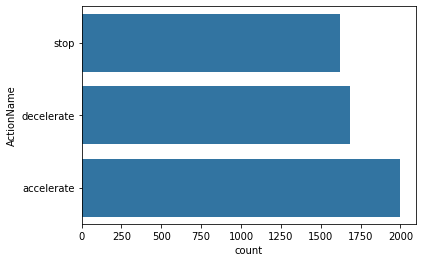

In [28]:
sns.countplot(datas_filtered['ActionName'], label="Count")

Text(0.5, 1.0, 'Distribution des y_fuel')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Valeur')

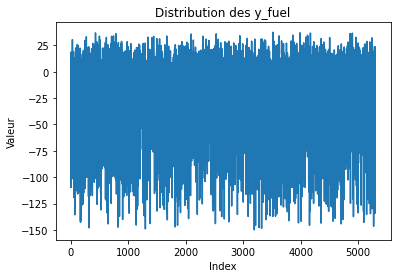

In [29]:
plt.plot(datas_filtered['y_fuel'])

# Ajouter un titre et des labels si nécessaire
plt.title('Distribution des y_fuel')
plt.xlabel('Index')
plt.ylabel('Valeur')

# Afficher le plot
plt.show()

<Figure size 576x432 with 0 Axes>

(array([  61.,  138.,  201.,  312.,  446.,  444.,  360., 1341., 1670.,
         326.]),
 array([-1.49963604e+02, -1.31223217e+02, -1.12482830e+02, -9.37424422e+01,
        -7.50020547e+01, -5.62616673e+01, -3.75212799e+01, -1.87808924e+01,
        -4.05049805e-02,  1.86998825e+01,  3.74402699e+01]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible')

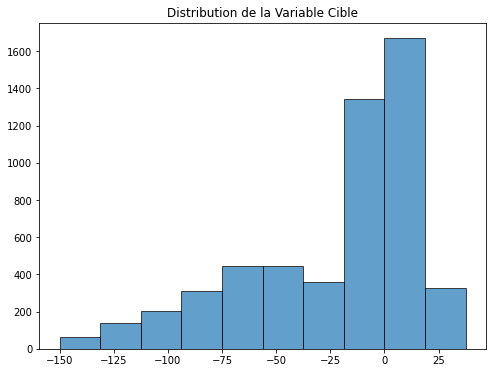

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(datas_filtered['y_fuel'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible')
# sns.distplot(np.array(datas['y_travel'].values), kde=True)
plt.show()

In [31]:
len(datas_filtered[datas_filtered['y_fuel'] >= 0])

1991

### Symetrie des donnees

In [32]:
pt = PowerTransformer()
datas_filtered['y_fuel_transformed'] = pt.fit_transform(datas_filtered['y_fuel'].values.reshape(-1, 1)).flatten()

<Figure size 576x432 with 0 Axes>

(array([ 210.,  511.,  774.,  627., 1512.,  881.,  454.,  210.,   88.,
          32.]),
 array([-2.29101484, -1.74322159, -1.19542834, -0.64763509, -0.09984184,
         0.44795141,  0.99574467,  1.54353792,  2.09133117,  2.63912442,
         3.18691767]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution de la Variable Cible')

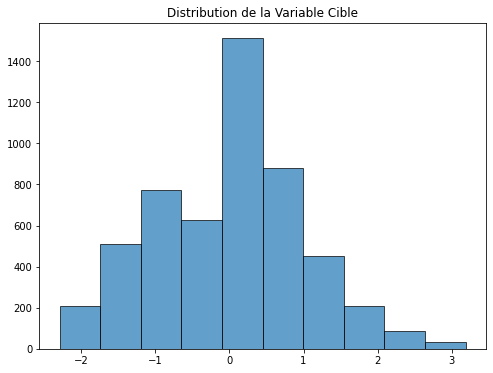

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(datas_filtered['y_fuel_transformed'], edgecolor='black', alpha=0.7)
plt.title('Distribution de la Variable Cible')
plt.show()

In [34]:
columns = ['Longitude', 'Latitude', 'Speed', 'LaneMaxSpeed', 'Acceleration', 'action_accelerate', 'action_decelerate', 'action_stop', 'ActionParam','ActionVehicleAhead','StartTime', 'EndTime', 'y_fuel', 'y_fuel_transformed']

In [35]:
pd.DataFrame(data=[datas_filtered[columns].skew(), datas_filtered[columns].kurtosis()], index=['skewness', 'kurtosis'])
# pd.DataFrame({"skewnwess":datas_filtered[columns].skew(), "kurtosis": datas_filtered[columns].kurtosis()}).T

,Longitude,Latitude,Speed,LaneMaxSpeed,Acceleration,action_accelerate,action_decelerate,action_stop,ActionParam,ActionVehicleAhead,StartTime,EndTime,y_fuel,y_fuel_transformed
skewness,-0.023801,0.549697,0.098484,1.116233,0.528403,0.505855,0.785660,0.845571,0.291027,0.672792,-0.066135,-0.051521,-1.049416,0.083828
kurtosis,-0.763920,-1.035298,-1.126059,1.330671,-0.323942,-1.744769,-1.383261,-1.285495,-0.917522,-0.201698,-1.097805,-0.923562,0.167292,-0.229250


### Correlation

In [36]:
final_datas = datas_filtered[[ 'Longitude','Latitude', 'Speed', 'Acceleration','LaneMaxSpeed',  'ActionId','action_accelerate', 'action_decelerate',
       'action_stop',  'ActionParam', 'ActionDuration', 'ActionVehicleAhead','StartTime', 'EndTime', 'y_fuel', 'y_fuel_transformed']]

<Figure size 1296x72 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélation Spearman')

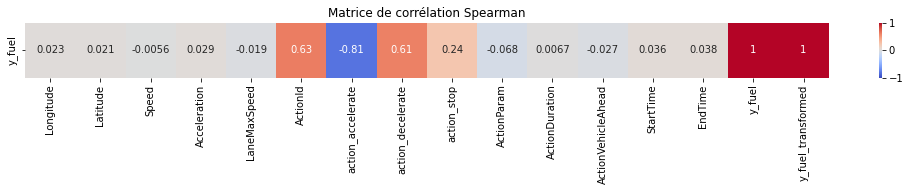

In [37]:
# Calculer la matrice de corrélation de Spearman
correlation_matrix_spearman = final_datas.corr(method="spearman")

# Afficher la matrice de corrélation
# print("Matrice de corrélation Spearman:\n", correlation_matrix_spearman)

# Visualiser la matrice de corrélation
plt.figure(figsize=(18, 1))
sns.heatmap(correlation_matrix_spearman.iloc[[-2]], annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matrice de corrélation Spearman')
plt.show()

In [38]:
min(datas_filtered['y_travel'])
max(datas_filtered['y_travel'])
# len(datas_filtered['ActionVehicleAhead'].unique())

-51.0

24.0

In [39]:
used_data = datas_filtered[['Longitude', 'Latitude', 'Speed','Acceleration', 'ActionVehicleAhead','ActionId',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'ActionDuration','StartTime', 'EndTime', 'y_fuel', 'y_travel']]
used_data.to_csv('final_datas.csv', index=False)

#### Machine Learning

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

In [41]:
scaler = StandardScaler()

In [42]:
mean =  datas_filtered[['Longitude', 'Latitude', 'Speed','Acceleration', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'StartTime', 'EndTime']].mean()

std =  datas_filtered[['Longitude', 'Latitude', 'Speed','Acceleration', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'StartTime', 'EndTime']].std()

In [43]:
(datas_filtered[['Longitude', 'Latitude', 'Speed','Acceleration', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'StartTime', 'EndTime']] - mean) / std

,Longitude,Latitude,Speed,Acceleration,ActionVehicleAhead,action_accelerate,action_decelerate,action_stop,ActionParam,StartTime,EndTime
0,1.400502,-0.847862,0.709725,1.460129,-1.174775,-0.778543,-0.681567,1.508178,-1.200476,-0.429515,-0.319378
1,-0.870628,1.222995,-1.077931,-0.024538,-0.339299,-0.778543,1.466930,-0.662926,0.833575,0.745937,0.494178
2,0.183689,-0.784078,0.693646,-0.455217,-0.339299,1.284207,-0.681567,-0.662926,-0.142231,-1.604967,-1.070352
3,0.186805,0.345334,0.472269,-0.987697,-0.339299,1.284207,-0.681567,-0.662926,0.926742,1.072451,1.057408
4,1.300723,-0.837067,1.289493,-0.230409,-1.174775,-0.778543,1.466930,-0.662926,1.723816,0.223514,-0.256797
...,...,...,...,...,...,...,...,...,...,...,...
5294,-1.069588,-1.449678,-2.096336,-0.901345,2.167129,-0.778543,1.466930,-0.662926,0.329323,-1.278453,-1.383258
5295,-1.080289,-1.458753,-1.614264,0.979373,0.496177,-0.778543,-0.681567,1.508178,-1.200476,-1.996785,-1.758745
5296,-0.034067,0.523827,0.419656,-1.422343,-0.339299,-0.778543,-0.681567,1.508178,-1.200476,1.464269,1.683220
5297,0.114260,-0.811600,-0.835556,-0.825278,0.496177,-0.778543,-0.681567,1.508178,-1.200476,-1.017241,-0.945190


In [44]:
X_fuel = datas_filtered[['Longitude', 'Latitude', 'Speed','Acceleration', 'ActionVehicleAhead',
                 'action_accelerate', 'action_decelerate', 'action_stop',  'ActionParam', 'StartTime', 'EndTime']].values
y_fuel = datas_filtered['y_fuel'].values

X_fuel = scaler.fit_transform(X_fuel)

X_train, X_test, y_train, y_test = train_test_split(X_fuel, y_fuel, test_size= 0.25, random_state= 42)

In [45]:
pd.DataFrame(X_fuel)

,0,1,2,3,4,5,6,7,8,9,10
0,1.400634,-0.847942,0.709792,1.460267,-1.174885,-0.778617,-0.681631,1.508321,-1.200589,-0.429556,-0.319408
1,-0.870710,1.223111,-1.078033,-0.024540,-0.339331,-0.778617,1.467069,-0.662989,0.833654,0.746007,0.494224
2,0.183707,-0.784152,0.693711,-0.455260,-0.339331,1.284329,-0.681631,-0.662989,-0.142244,-1.605119,-1.070453
3,0.186823,0.345366,0.472314,-0.987790,-0.339331,1.284329,-0.681631,-0.662989,0.926829,1.072552,1.057508
4,1.300846,-0.837146,1.289614,-0.230431,-1.174885,-0.778617,1.467069,-0.662989,1.723979,0.223535,-0.256821
...,...,...,...,...,...,...,...,...,...,...,...
5294,-1.069689,-1.449815,-2.096534,-0.901430,2.167333,-0.778617,1.467069,-0.662989,0.329354,-1.278574,-1.383388
5295,-1.080391,-1.458891,-1.614416,0.979465,0.496224,-0.778617,-0.681631,1.508321,-1.200589,-1.996973,-1.758911
5296,-0.034070,0.523877,0.419696,-1.422477,-0.339331,-0.778617,-0.681631,1.508321,-1.200589,1.464407,1.683379
5297,0.114270,-0.811677,-0.835635,-0.825356,0.496224,-0.778617,-0.681631,1.508321,-1.200589,-1.017337,-0.945279


In [46]:
scaler

StandardScaler()

In [47]:
# Initialiser les modèles
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR Linear': SVR(kernel='linear'),
    'SVR Poly': SVR(kernel='poly'),
    'SVR RBF': SVR(kernel='rbf'),
    'SVR Sigmoid': SVR(kernel='sigmoid'),
    # 'GPR' : GaussianProcessRegressor(1 * RBF(1.0)),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ada Boost': AdaBoostRegressor(),
    # 'GaussianNB': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'MLP': MLPRegressor(alpha=1)
}

### Entrainement des modeles avec kFold

In [48]:
from sklearn.model_selection import KFold, cross_val_score

names = []
result = []

for name, model in models.items():
    kfold = KFold(n_splits=10, random_state= 1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    result.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

Linear: 0.7448344431741354 (0.0073914711654859775)
Ridge: 0.744914075700987 (0.007301684165151942)
Lasso: 0.7312329020641314 (0.012125915860827322)
ElasticNet: 0.6770041571084459 (0.014615456975455684)
SVR Linear: 0.7293428766664174 (0.01203274448028278)
SVR Poly: 0.6528702754454849 (0.030254773063768878)
SVR RBF: 0.7316377996686412 (0.010577845763638474)
SVR Sigmoid: 0.4683465515381533 (0.0500473657844515)
Decision Tree: 0.6880742723066909 (0.034010006517080936)
Random Forest: 0.8468546428773737 (0.01144387296510511)
Gradient Boosting: 0.8146440767794644 (0.006643362845566084)
Ada Boost: 0.7815282128612423 (0.013015023693024923)
K-Nearest Neighbors: 0.8061363393621435 (0.014480134067774372)


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

MLP: 0.8313032671956456 (0.011921738514563681)


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<div align="center">

$$
\mathbf{NRMSE} = \frac{\sqrt{MSE}}{y_{max} - y_{min}} = \frac{\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{y_{max} - y_{min}}
$$

</div>


In [49]:
def normalized_root_mean_squared_error(y_true, y_pred):
    val_min, val_max = min(y_true), max(y_true)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse / (val_max - val_min) 

LinearRegression()

Train N. R. Mean Squared Error for Linear: 0.1079422758616363
Test N. R. Mean Squared Error for Linear: 0.11083711921380436
Train R2 Score Linear: 0.7466693815154224
Test R2 Score Linear: 0.7316839262148358


Ridge()

Train N. R. Mean Squared Error for Ridge: 0.10794169056631525
Test N. R. Mean Squared Error for Ridge: 0.11081714938628114
Train R2 Score Ridge: 0.7466721287768174
Test R2 Score Ridge: 0.7317806039893954


Lasso()

Train N. R. Mean Squared Error for Lasso: 0.11098641216384439
Test N. R. Mean Squared Error for Lasso: 0.11262316582621486
Train R2 Score Lasso: 0.7321792839042062
Test R2 Score Lasso: 0.7229668795909022


ElasticNet()

Train N. R. Mean Squared Error for ElasticNet: 0.12175603795281749
Test N. R. Mean Squared Error for ElasticNet: 0.12184616504660983
Train R2 Score ElasticNet: 0.6776812597004138
Test R2 Score ElasticNet: 0.675735084957779


SVR(kernel='linear')

Train N. R. Mean Squared Error for SVR Linear: 0.11131771808375739
Test N. R. Mean Squared Error for SVR Linear: 0.11307807412484767
Train R2 Score SVR Linear: 0.7305779523181528
Test R2 Score SVR Linear: 0.7207243714104603


SVR(kernel='poly')

Train N. R. Mean Squared Error for SVR Poly: 0.12383782719760872
Test N. R. Mean Squared Error for SVR Poly: 0.12644760096045884
Train R2 Score SVR Poly: 0.6665649966045695
Test R2 Score SVR Poly: 0.6507813576401887


SVR()

Train N. R. Mean Squared Error for SVR RBF: 0.10851436254343964
Test N. R. Mean Squared Error for SVR RBF: 0.10806908493444457
Train R2 Score SVR RBF: 0.7439769957276139
Test R2 Score SVR RBF: 0.7449183722057543


SVR(kernel='sigmoid')

Train N. R. Mean Squared Error for SVR Sigmoid: 0.1698695640962964
Test N. R. Mean Squared Error for SVR Sigmoid: 0.16964772840870065
Train R2 Score SVR Sigmoid: 0.37261275215632583
Test R2 Score SVR Sigmoid: 0.37140296369444525


DecisionTreeRegressor()

Train N. R. Mean Squared Error for Decision Tree: 0.0
Test N. R. Mean Squared Error for Decision Tree: 0.11978803854931558
Train R2 Score Decision Tree: 1.0
Test R2 Score Decision Tree: 0.6865970075805395


RandomForestRegressor()

Train N. R. Mean Squared Error for Random Forest: 0.031112389419538432
Test N. R. Mean Squared Error for Random Forest: 0.08302531261328085
Train R2 Score Random Forest: 0.9789539172106267
Test R2 Score Random Forest: 0.8494442763985954


GradientBoostingRegressor()

Train N. R. Mean Squared Error for Gradient Boosting: 0.08434399724052342
Test N. R. Mean Squared Error for Gradient Boosting: 0.09299394044314493
Train R2 Score Gradient Boosting: 0.8453275727195164
Test R2 Score Gradient Boosting: 0.8111201920363963


AdaBoostRegressor()

Train N. R. Mean Squared Error for Ada Boost: 0.0983707520560351
Test N. R. Mean Squared Error for Ada Boost: 0.10042697564262718
Train R2 Score Ada Boost: 0.7896044617839085
Test R2 Score Ada Boost: 0.7797190201046407


KNeighborsRegressor()

Train N. R. Mean Squared Error for K-Nearest Neighbors: 0.07701204783910584
Test N. R. Mean Squared Error for K-Nearest Neighbors: 0.09874534922384696
Train R2 Score K-Nearest Neighbors: 0.8710498397299999
Test R2 Score K-Nearest Neighbors: 0.7870343639777634


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=1)

Train N. R. Mean Squared Error for MLP: 0.08556193871089238
Test N. R. Mean Squared Error for MLP: 0.08945663734324646
Train R2 Score MLP: 0.8408283290674712
Test R2 Score MLP: 0.8252161225175417


Text(0.5, 0, 'Model')

Text(0, 0.5, 'Mean Squared Error')

Text(0, 0.5, 'R2 Score')

Text(0.5, 1.05, 'Comparison of Regression Models')

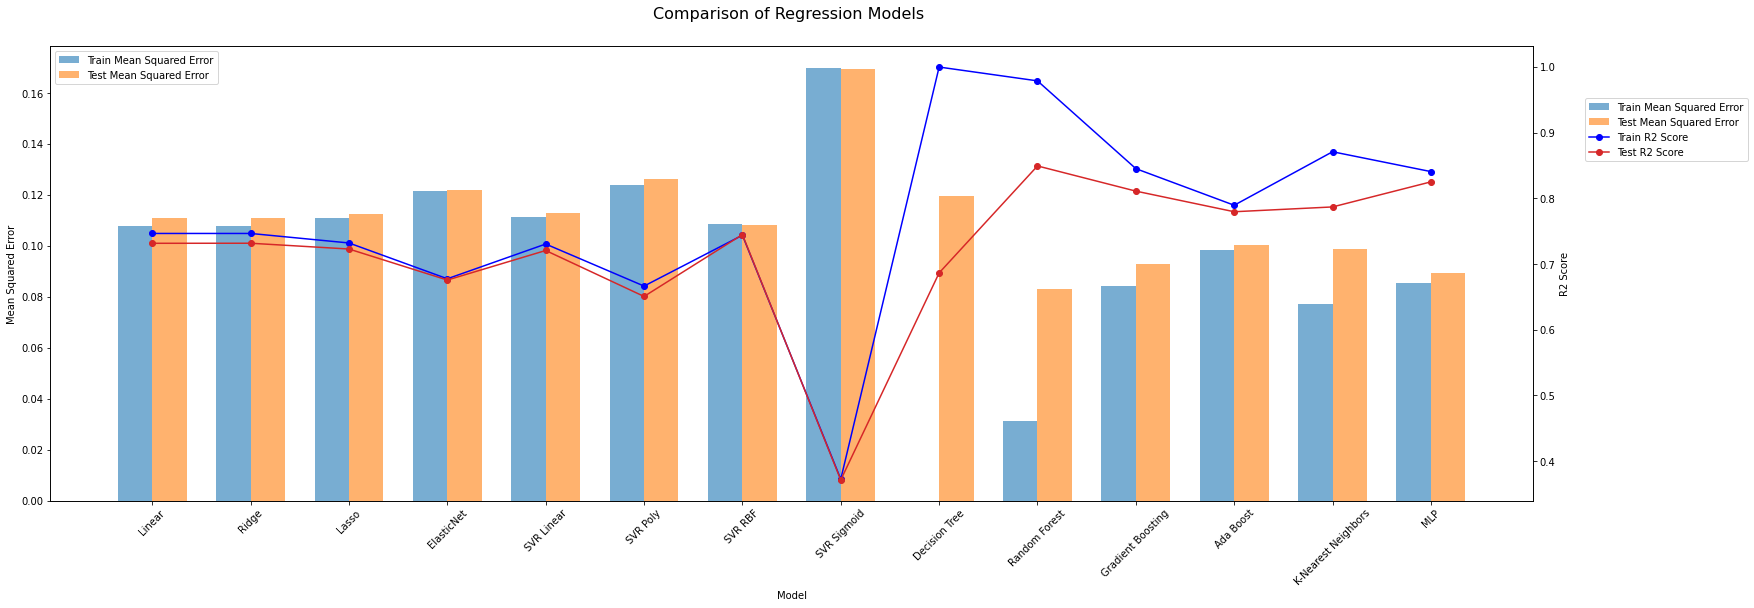

In [50]:
# Dictionnaire pour stocker les résultats
results = {'Model': [], 'Train Mean Squared Error': [], 'Test Mean Squared Error': [], 'Train R2 Score': [], 'Test R2 Score': []}


train_predictions = {}
trained_models = {}
# Entraîner et évaluer chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    # Prédictions sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    train_nrmse = normalized_root_mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    y_pred = model.predict(X_test)
    nrmse = normalized_root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(name)
    results['Train Mean Squared Error'].append(train_nrmse)
    results['Test Mean Squared Error'].append(nrmse)
    results['Train R2 Score'].append(train_r2)
    results['Test R2 Score'].append(r2)

    train_predictions[name] = pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred, 'squared_error': (y_train - y_train_pred) **2})
    trained_models[name] = model

    print(f"Train N. R. Mean Squared Error for {name}: {train_nrmse}")
    print(f"Test N. R. Mean Squared Error for {name}: {nrmse}")
    print(f"Train R2 Score {name}: {train_r2}")
    print(f"Test R2 Score {name}: {r2}")

# Convertir les résultats en DataFrame pour une manipulation plus facile
results_df = pd.DataFrame(results)

# Convertir les colonnes du DataFrame en tableaux NumPy
models = results_df['Model'].to_numpy()
train_mse_values = results_df['Train Mean Squared Error'].to_numpy()
test_mse_values = results_df['Test Mean Squared Error'].to_numpy()
train_r2_values = results_df['Train R2 Score'].to_numpy()
test_r2_values = results_df['Test R2 Score'].to_numpy()

# Tracer les résultats
fig, ax1 = plt.subplots(figsize=(22, 8))

# Position des barres
x = np.arange(len(models))  # la position des groupes
width = 0.35  # la largeur des barres

# Tracer les Mean Squared Error pour l'entraînement et le test côte à côte
rects1 = ax1.bar(x - width/2, train_mse_values, width, label='Train Mean Squared Error', color='#1f77b4', alpha=0.6)
rects2 = ax1.bar(x + width/2, test_mse_values, width, label='Test Mean Squared Error', color='#ff7f0e', alpha=0.6)

# Tracer les Mean Squared Error
# color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Squared Error')
# ax1.bar(models, mse_values, color=color, alpha=0.6, label='Mean Squared Error')
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.bar(models, train_mse_values, color='blue', alpha=0.6, label='Train Mean Squared Error')
# ax1.bar(models, test_mse_values, color='red', alpha=0.6, label='Test Mean Squared Error', bottom=train_mse_values)
ax1.set_xticks(x)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')

# Ajouter une deuxième axe pour le R2 Score
ax2 = ax1.twinx()
# color = 'tab:blue'
ax2.set_ylabel('R2 Score')
# ax2.plot(models, r2_values, color=color, marker='o', linewidth=2, label='R2 Score')
# ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(models, train_r2_values, color='blue', marker='o', label='Train R2 Score')
ax2.plot(models, test_r2_values, color='#d62728', marker='o', label='Test R2 Score')
ax2.tick_params(axis='y')

# Ajouter un titre et afficher la légende
fig.tight_layout()
fig.suptitle('Comparison of Regression Models', y=1.05, fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

# Afficher le graphique
plt.show()

In [51]:
rf_model = trained_models['Random Forest']

In [65]:
import joblib
joblib.dump(rf_model, 'rf_fuel.joblib')

['rf_fuel.joblib']

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définir les distributions des hyperparamètres pour la recherche aléatoire
param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()

# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5, 
                                   n_jobs=-1, 
                                   random_state=42)

# Exécuter RandomizedSearchCV pour trouver les meilleurs hyperparamètres
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés:")
print(random_search.best_params_)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237AF362590>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237AF331C30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237AF330DF0>},
                   random_state=42)

Meilleurs hyperparamètres trouvés:
{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 115}


In [53]:
# Utiliser le meilleur modèle trouvé pour faire des prédictions
best_rf = random_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

best_train_nrmse = normalized_root_mean_squared_error(y_train, y_train_pred)
best_test_nrmse = normalized_root_mean_squared_error(y_test, y_test_pred)

print("Train R^2 Score Random Forest:", r2_score(y_train, y_train_pred))
print("Test R^2 Score Random Forest:", r2_score(y_test, y_test_pred))
print("Train Normalized Root Mean Squared Error for Random Forest:", best_train_nrmse)
print("Test Normalized Root Mean Squared Error for Random Forest:", best_test_nrmse)


Train R^2 Score Random Forest: 0.9695821475577736
Test R^2 Score Random Forest: 0.8474051299597074
Train Normalized Root Mean Squared Error for Random Forest: 0.037403479362257096
Test Normalized Root Mean Squared Error for Random Forest: 0.08358567444526734


### Deep Learning

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
import tensorflow.keras as tk

In [55]:
X_dl_train, X_dl_test, y_dl_train, y_dl_test = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(X_travel, y_travel, test_size=0.2, random_state=42)
# # Standardiser les données
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

def nrmse(y_true, y_pred):
    """
    Calculate the Normalized Root Mean Square Error (NRMSE)
    """
    rms = K.sqrt(K.mean(K.square(y_pred - y_true)))
    nrmse = rms / (K.max(y_true) - K.min(y_true))
    return nrmse

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot )

# Créer le modèle de deep learning
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=nrmse, 
              metrics=[r2_score])

In [57]:
# model.summary()

In [58]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entraîner le modèle
history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=16, 
                    validation_data= (X_test, y_test), 
                    verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
249/249 [==============================] - 5s 9ms/step - loss: 0.2910 - r2_score: 0.0173 - val_loss: 0.2613 - val_r2_score: 0.2114 - lr: 0.0010
Epoch 2/100
249/249 [==============================] - 2s 6ms/step - loss: 0.2032 - r2_score: 0.5105 - val_loss: 0.1755 - val_r2_score: 0.6360 - lr: 0.0010
Epoch 3/100
249/249 [==============================] - 1s 6ms/step - loss: 0.1701 - r2_score: 0.6266 - val_loss: 0.1370 - val_r2_score: 0.7711 - lr: 0.0010
Epoch 4/100
249/249 [==============================] - 2s 6ms/step - loss: 0.1551 - r2_score: 0.6767 - val_loss: 0.1293 - val_r2_score: 0.7901 - lr: 0.0010
Epoch 5/100
249/249 [==============================] - 1s 5ms/step - loss: 0.1583 - r2_score: 0.6532 - val_loss: 0.1276 - val_r2_score: 0.7965 - lr: 0.0010
Epoch 6/100
249/249 [==============================] - 1s 6ms/step - loss: 0.1595 - r2_score: 0.6414 - val_loss: 0.1272 - val_r2_score: 0.7977 - lr: 0.0010
Epoch 7/100
249/249 [==============================] - 1s 4ms/st

In [59]:
# def r2_score_t(y_true, y_pred):
#     SS_res = np.sum((y_true - y_pred) ** 2)
#     SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
#     return 1 - (SS_res / SS_tot)

In [60]:
# # Évaluer le modèle sur les données de test
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# train_mse = normalized_root_mean_squared_error(y_train, y_train_pred)
# test_mse = normalized_root_mean_squared_error(y_test, y_test_pred)

# train_r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
# r2_score_t(y_train, y_train_pred)
# test_r2 = sklearn.metrics.r2_score(y_test, y_test_pred)

# print(f"Train Mean Squared Error: {train_mse}")
# print(f"Test Mean Squared Error: {test_mse}")
# print(f"Train R2 Score: {train_r2}")
# print(f"Test R2 Score: {test_r2}")

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Historique de la perte')

Text(0.5, 0, 'Épochs')

Text(0, 0.5, 'Loss')

<AxesSubplot:>

Text(0.5, 1.0, 'Historique du R² score')

Text(0.5, 0, 'Épochs')

Text(0, 0.5, 'R² score')

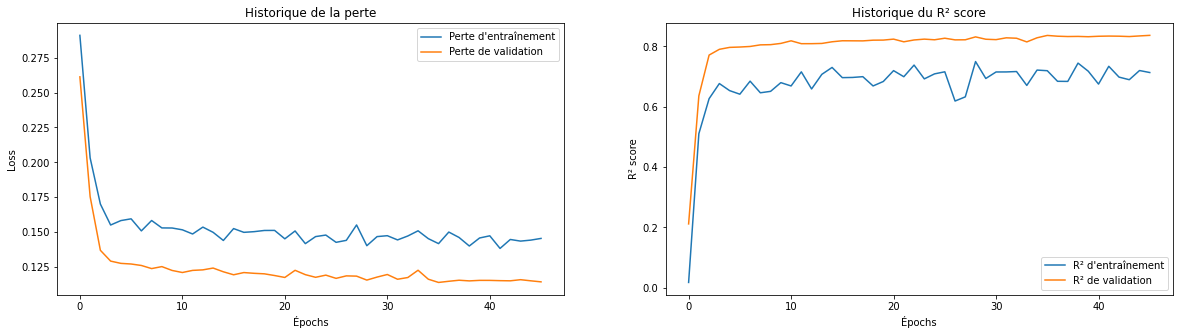

In [61]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Historique de la perte')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score'], label='R² d\'entraînement')
plt.plot(history.history['val_r2_score'], label='R² de validation')
plt.title('Historique du R² score')
plt.xlabel('Épochs')
plt.ylabel('R² score')
plt.legend()

plt.show()

In [62]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 3ms/step - loss: 0.0939 - r2_score: 0.8688


[0.09392387419939041, 0.8687843084335327]

42/42 [==============================] - 0s 3ms/step - loss: 0.0995 - r2_score: 0.8573


[0.0995163694024086, 0.8573451042175293]

#### Sauvegarde des donnees du modele

In [63]:
import joblib
from keras.models import save_model

joblib.dump(scaler, 'scaler_fuel.pkl')

model.save('model_fuel.h5')

['scaler_fuel.pkl']